In [1]:
import numpy as np
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2
from core_functions import *
from regu_functions import *
from opt_utl import *


In [2]:
import h5py

# Import data from datafile 'datasets/train_catvnoncat.h5', which is from the Coursera DLS

train_dataset = h5py.File('datasets/train_catvnoncat.h5', "r") 
train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

test_dataset = h5py.File('datasets/test_catvnoncat.h5', "r")
test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

classes = np.array(test_dataset["list_classes"][:]) # the list of classes

train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))

# simply normalizing

train_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1).T # -1 flatten the structure(64, 64, 3) into (12288)
test_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1).T

train_x = train_x_flatten/255
test_x = test_x_flatten/255

In [3]:
def model(X, Y, layer_dims, lambd = 0.1, learning_rate = 0.05, beta1 = 0.9, beta2 = 0.999, epsilon = 1e-8, mini_batch_size = 32, keep_prob = 0.86, 
          num_iterations = 100, num_epoches = 1000, print_cost = False):
    m = Y.shape[1]
    parameters = initialize_parameters_he(layer_dims)
    costs = []
    v, s = initialize_adam(parameters)
    seed = 10
    t = 0
    
    for i in range(num_epoches):
        seed = seed + 1
        mini_batches = random_mini_batches(X, Y, mini_batch_size = 32, seed = seed)
        cost_total = 0
        
        for mini_batch in mini_batches:
            X, Y = mini_batch
        
            AL, caches = forward_propagation_do(X, parameters, keep_prob)
            cost_total = cost_total + compute_cost_with_regu_ltwo(AL, Y, parameters, lambd)
            grads = backward_propagation_regu_do(AL, Y, caches, lambd, keep_prob)
        
            t = t + 1
            parameters = update_parameters_with_adam(parameters, grads, t, learning_rate, beta1, beta2, epsilon)
            
        cost_avg = cost_total / m    #用了minibatch方法后，就不用每次都记录cost了，多次叠加后取平均值
        
        if print_cost and i % 100 == 0:
            print("Cost after epoch %i: %f" %(i, cost_avg))
        if print_cost and i % 10 == 0:
            costs.append(cost_avg)
            
    # plot the cost
    plt.plot(costs)
    plt.ylabel('cost')
    plt.xlabel('epochs (per 100)')
    plt.title("Learning rate = " + str(learning_rate))
    plt.show()
    
    return parameters
            

Cost after epoch 0: 0.026843
Cost after epoch 100: 0.003010
Cost after epoch 200: 0.002871
Cost after epoch 300: 0.002792
Cost after epoch 400: 0.002892
Cost after epoch 500: 0.002964
Cost after epoch 600: 0.002985
Cost after epoch 700: 0.003009
Cost after epoch 800: 0.003003
Cost after epoch 900: 0.002981


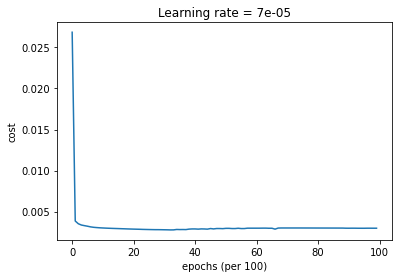

Accuracy:  0.6363636363636364
Accuracy:  0.4600000000000001


In [11]:
n = train_x.shape[0]
layer_dims = [n,20,7,5,1] 

parameters = model(train_x, train_set_y_orig, layer_dims, lambd = 0.1, learning_rate = 0.00007, beta1 = 0.9, beta2 = 0.999, epsilon = 1e-8, 
                   mini_batch_size = 32, keep_prob = 1, num_iterations = 100, num_epoches = 1000, print_cost = True)

p_train = predict(train_x, train_set_y_orig, parameters)
p_test = predict(test_x, test_set_y_orig, parameters)

In [9]:
#感觉加入adam的尝试很失败啊。。。两个accuracy都下降了还，反向优化了属于是；不加dropout还好，加了整个曲线在发抖

Accuracy:  0.6507177033492823
Accuracy:  0.4


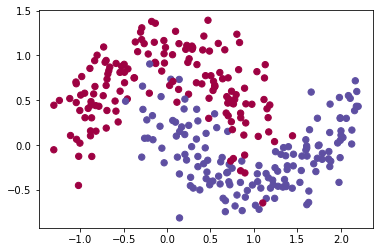

In [12]:
# This line import/generate the same data from the course
train_X, train_Y = load_dataset()

Cost after epoch 0: 0.023763
Cost after epoch 100: 0.002699
Cost after epoch 200: 0.002169
Cost after epoch 300: 0.001594
Cost after epoch 400: 0.001343
Cost after epoch 500: 0.001172
Cost after epoch 600: 0.000988
Cost after epoch 700: 0.000763
Cost after epoch 800: 0.000617
Cost after epoch 900: 0.000536


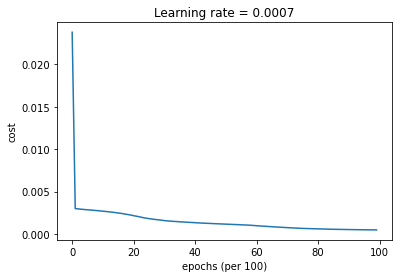

Accuracy:  0.6866666666666666


In [14]:
n = train_X.shape[0]
layer_dims = [n,20,7,5,1] 

parameters = model(train_X, train_Y, layer_dims, lambd = 0.1, learning_rate = 0.0007, beta1 = 0.9, beta2 = 0.999, epsilon = 1e-8, 
                   mini_batch_size = 32, keep_prob = 1, num_iterations = 100, num_epoches = 1000, print_cost = True)

# Predict
predictions = predict(train_X, train_Y, parameters)

In [ ]:
# 打算先放弃在猫猫model上进行adam优化，先网后推进，或许将来会有新的理解 ;)